=== Named Entity Recognition (NER) & VADER Sentiment Analysis ===
                                              review  \
0  I love my new Apple iPhone 14 Pro Max! It's su...   
1  Terrible experience with Samsung Galaxy S22, b...   
2  Great sound quality from Bose QuietComfort 45 ...   
3  The Sony WH-1000XM5 headphones are overpriced,...   
4  Logitech MX Master 3 mouse is super comfortabl...   
5  Absolutely hate this Xiaomi Redmi Note 12, fre...   
6  Amazon Kindle Paperwhite is perfect for readin...   
7  Horrible experience with Dell XPS 15 laptop. V...   
8  Sony PlayStation 5 gives an amazing gaming exp...   
9  Canon EOS R6 camera is great for professional ...   

                                  entities sentiment  sentiment_score  \
0                           [(Apple, ORG)]  Positive           0.9215   
1              [(Samsung Galaxy S22, ORG)]  Negative          -0.7269   
2             [(QuietComfort 45, PRODUCT)]  Positive           0.6588   
3                        

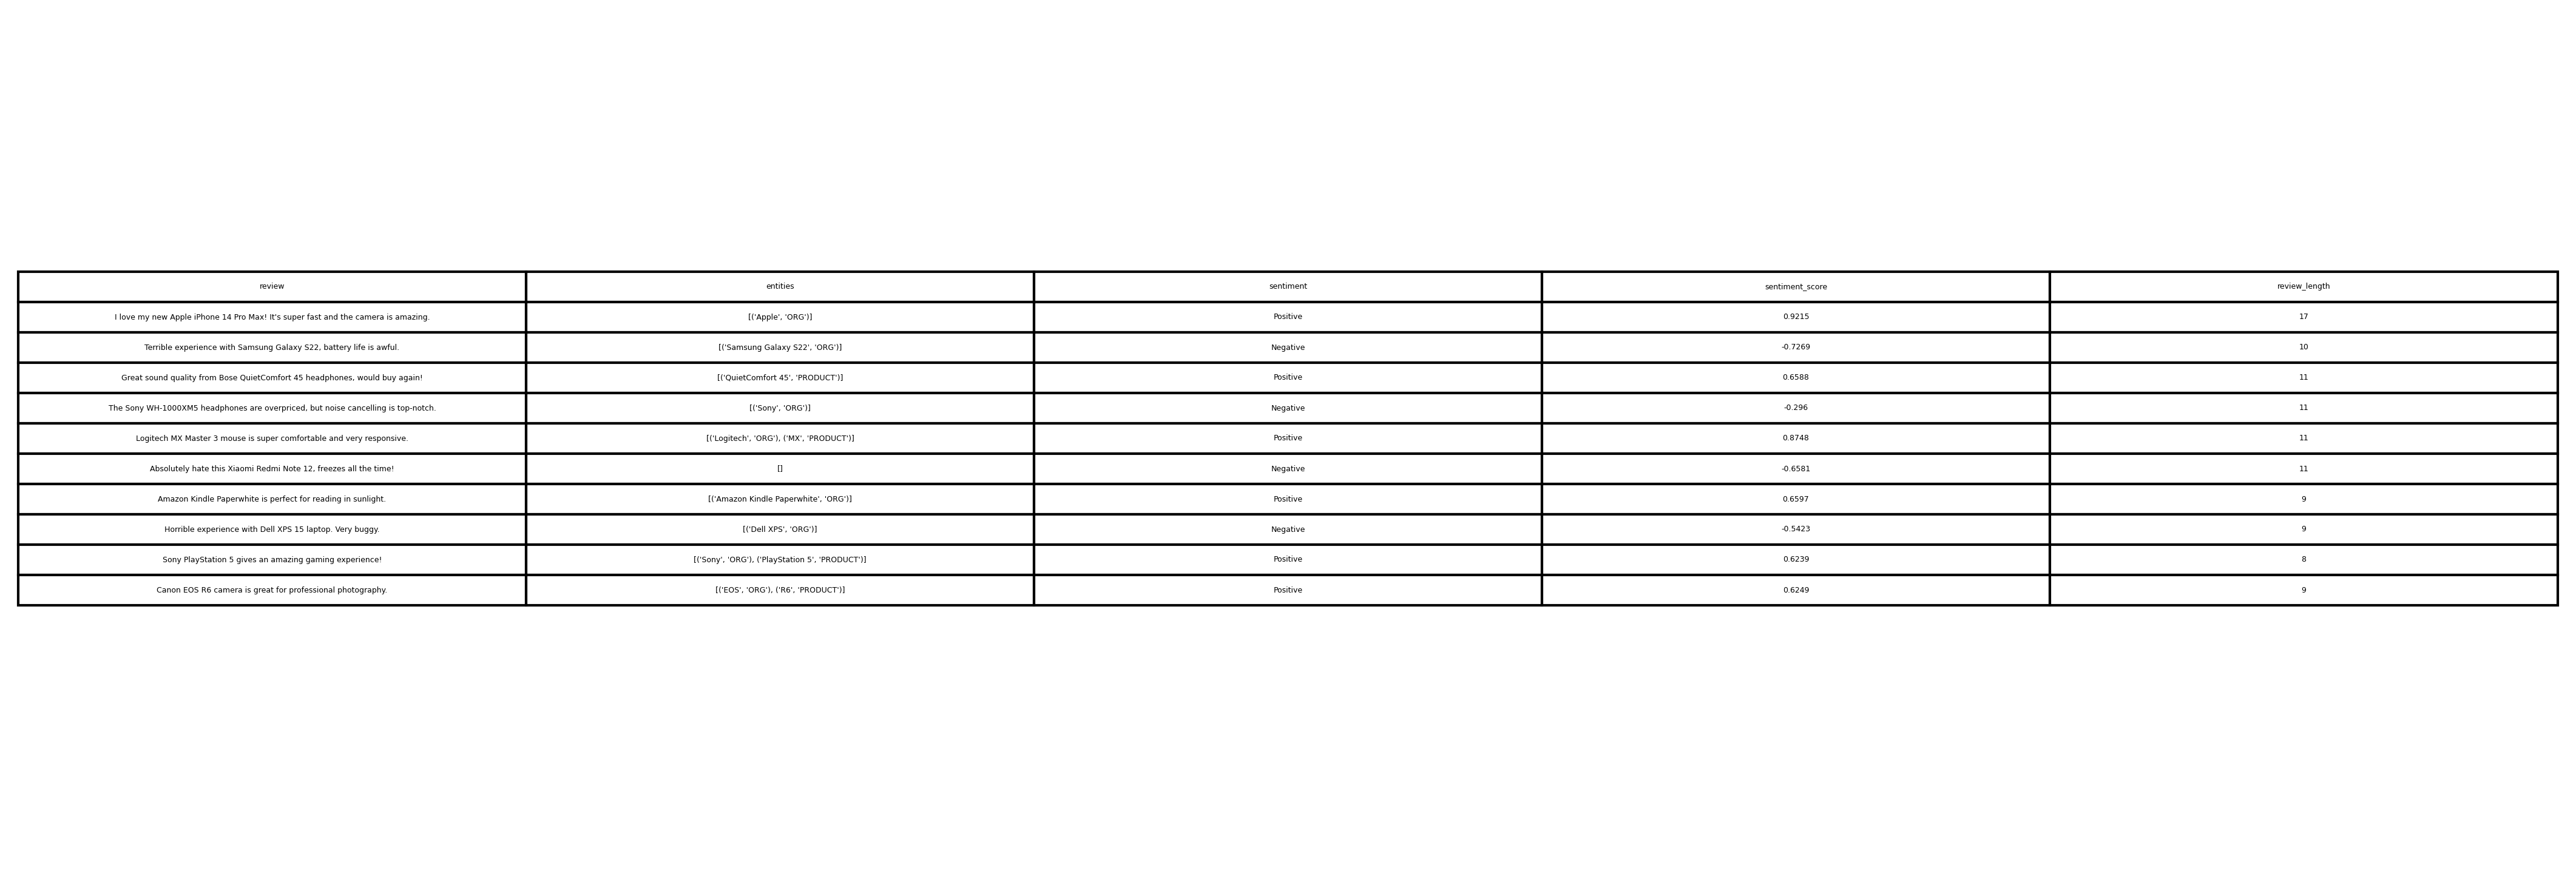

In [2]:
# AI Tools Assignment - Part 2: Task 3
# NLP with spaCy on Amazon Product Reviews (Full Version)

# ---------------------------------------------
# Step 1️⃣: Install spaCy and VADER if needed
# ---------------------------------------------
# In Google Colab:
# !pip install -U spacy
# !pip install vaderSentiment
# !python -m spacy download en_core_web_sm

# ---------------------------------------------
# Step 2️⃣: Import libraries
# ---------------------------------------------
import spacy
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load spaCy small English model
nlp = spacy.load("en_core_web_sm")

# Initialize VADER sentiment analyzer
vader_analyzer = SentimentIntensityAnalyzer()

# ---------------------------------------------
# Step 3️⃣: Load Amazon Product Reviews Data
# ---------------------------------------------
# Example data (replace with your real dataset or Kaggle CSV)
reviews = [
    "I love my new Apple iPhone 14 Pro Max! It's super fast and the camera is amazing.",
    "Terrible experience with Samsung Galaxy S22, battery life is awful.",
    "Great sound quality from Bose QuietComfort 45 headphones, would buy again!",
    "The Sony WH-1000XM5 headphones are overpriced, but noise cancelling is top-notch.",
    "Logitech MX Master 3 mouse is super comfortable and very responsive.",
    "Absolutely hate this Xiaomi Redmi Note 12, freezes all the time!",
    "Amazon Kindle Paperwhite is perfect for reading in sunlight.",
    "Horrible experience with Dell XPS 15 laptop. Very buggy.",
    "Sony PlayStation 5 gives an amazing gaming experience!",
    "Canon EOS R6 camera is great for professional photography."
]

df_reviews = pd.DataFrame(reviews, columns=['review'])

# ---------------------------------------------
# Step 4️⃣: NER Extraction Function
# ---------------------------------------------
def extract_entities(text):
    doc = nlp(text)
    entities = []
    for ent in doc.ents:
        if ent.label_ in ["PRODUCT", "ORG"]:
            entities.append((ent.text, ent.label_))
    return entities

# ---------------------------------------------
# Step 5️⃣: Custom NER Patterns (optional)
# ---------------------------------------------
# If you want to add custom patterns:
# Uncomment below to add EntityRuler

# from spacy.pipeline import EntityRuler
# ruler = nlp.add_pipe("entity_ruler")
# patterns = [
#     {"label": "PRODUCT", "pattern": "Redmi Note 12"},
#     {"label": "PRODUCT", "pattern": "Kindle Paperwhite"},
#     {"label": "ORG", "pattern": "Sony"},
#     {"label": "ORG", "pattern": "Amazon"}
# ]
# ruler.add_patterns(patterns)

# ---------------------------------------------
# Step 6️⃣: VADER Sentiment Function
# ---------------------------------------------
def vader_sentiment(text):
    score = vader_analyzer.polarity_scores(text)
    compound = score['compound']
    if compound >= 0.05:
        return "Positive"
    elif compound <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# ---------------------------------------------
# Step 7️⃣: Apply NER and Sentiment
# ---------------------------------------------
df_reviews['entities'] = df_reviews['review'].apply(extract_entities)
df_reviews['sentiment'] = df_reviews['review'].apply(vader_sentiment)

# Add VADER compound score
df_reviews['sentiment_score'] = df_reviews['review'].apply(lambda x: vader_analyzer.polarity_scores(x)['compound'])

# Add review length (word count)
df_reviews['review_length'] = df_reviews['review'].apply(lambda x: len(x.split()))

# ---------------------------------------------
# Step 8️⃣: Display Results
# ---------------------------------------------
print("=== Named Entity Recognition (NER) & VADER Sentiment Analysis ===")
print(df_reviews)

# ---------------------------------------------
# Step 9️⃣: Save Output to CSV
# ---------------------------------------------
df_reviews.to_csv("amazon_reviews_ner_sentiment.csv", index=False)
print("\nResults saved as amazon_reviews_ner_sentiment.csv")

# ---------------------------------------------
# Optional: Show all unique entities
# ---------------------------------------------
all_entities = []
for ents in df_reviews['entities']:
    all_entities.extend(ents)

unique_entities = list(set(all_entities))
print("\nUnique Entities found:")
for entity_tuple in unique_entities:
    # entity_tuple is (entity, label)
    print(f"- {entity_tuple[0]} ({entity_tuple[1]})")

import matplotlib.pyplot as plt

# Save DataFrame as a high-resolution image with larger font
fig, ax = plt.subplots(figsize=(18, 6))  # Larger figure for clarity
ax.axis('off')
tbl = ax.table(
    cellText=df_reviews.astype(str).values,
    colLabels=df_reviews.columns,
    loc='center',
    cellLoc='center'
)

# Set font size for all cells
for key, cell in tbl.get_celld().items():
    cell.set_fontsize(20)  # Increase font size

plt.savefig("reviews_table.png", bbox_inches='tight', dpi=300)  # Higher DPI for clarity
plt.close(fig)

from IPython.display import Image, display
display(Image(filename="reviews_table.png"))